In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import cv2
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
df["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [4]:
train = df[["emotion", "pixels"]][df["Usage"] == "Training"]
train.isnull().sum()

emotion    0
pixels     0
dtype: int64

In [5]:
train['pixels'] = train['pixels'].apply(lambda im: np.fromstring(im, sep=' '))
x_train = np.vstack(train['pixels'].values)
y_train = np.array(train["emotion"])
x_train.shape, y_train.shape

((28709, 2304), (28709,))

In [6]:
public_test_df = df[["emotion", "pixels"]][df["Usage"]=="PublicTest"]

In [7]:
public_test_df["pixels"] = public_test_df["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
x_test = np.vstack(public_test_df["pixels"].values)
y_test = np.array(public_test_df["emotion"])

In [8]:
x_train = x_train.reshape(-1, 48, 48, 1)
x_test = x_test.reshape(-1, 48, 48, 1)
x_train.shape, x_test.shape

((28709, 48, 48, 1), (3589, 48, 48, 1))

In [9]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape, y_test.shape

((28709, 7), (3589, 7))

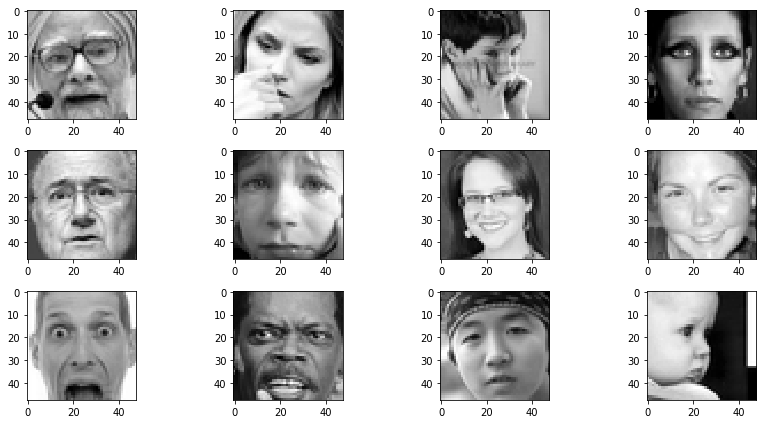

In [10]:
import seaborn as sns
plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.imshow(x_train[i, :, :, 0], cmap="gray")

plt.tight_layout()
plt.show()

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, Y_train, metrics= )

In [31]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3,3), input_shape=(48, 48, 1)))
model.add(Activation("sigmoid"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("sigmoid"))
model.add(Dropout(0.5))

model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model.summary()

In [32]:
# save best weights
#checkpointer = ModelCheckpoint(filepath='face_model.h5', verbose=1, save_best_only=True)

# num epochs
epochs = 20

# run model
hist = model.fit(x_train, y_train, epochs=epochs,
                 shuffle=True,
                 batch_size=100, validation_data=(x_test, y_test),
                 verbose=2)

# save model to json
model_json = model.to_json()
with open("face_model.json", "w") as json_file:
    json_file.write(model_json)

Train on 28709 samples, validate on 3589 samples
Epoch 1/20
 - 33s - loss: 1.7907 - acc: 0.2688 - val_loss: 1.6196 - val_acc: 0.3711
Epoch 2/20
 - 32s - loss: 1.5682 - acc: 0.3876 - val_loss: 1.6898 - val_acc: 0.3070
Epoch 3/20
 - 32s - loss: 1.4503 - acc: 0.4387 - val_loss: 1.3837 - val_acc: 0.4720
Epoch 4/20
 - 32s - loss: 1.3711 - acc: 0.4723 - val_loss: 1.4209 - val_acc: 0.4497
Epoch 5/20
 - 32s - loss: 1.3209 - acc: 0.4941 - val_loss: 1.4767 - val_acc: 0.4464
Epoch 6/20
 - 32s - loss: 1.2785 - acc: 0.5100 - val_loss: 1.3041 - val_acc: 0.5046
Epoch 7/20
 - 32s - loss: 1.2434 - acc: 0.5247 - val_loss: 1.2945 - val_acc: 0.5010
Epoch 8/20
 - 32s - loss: 1.2156 - acc: 0.5368 - val_loss: 1.3836 - val_acc: 0.4776
Epoch 9/20
 - 32s - loss: 1.1985 - acc: 0.5475 - val_loss: 1.3762 - val_acc: 0.5024
Epoch 10/20
 - 32s - loss: 1.1796 - acc: 0.5526 - val_loss: 1.2914 - val_acc: 0.5121
Epoch 11/20
 - 32s - loss: 1.1615 - acc: 0.5602 - val_loss: 1.4833 - val_acc: 0.4731
Epoch 12/20
 - 32s - loss

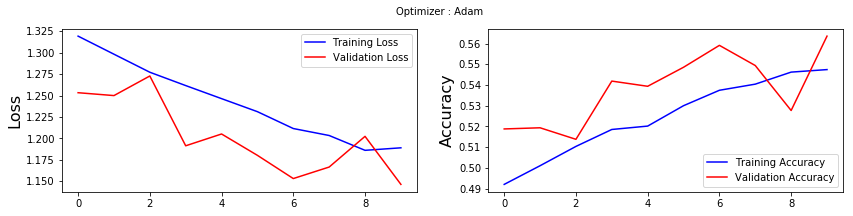

In [15]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [19]:
test = df[["emotion", "pixels"]][df["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [22]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])

In [23]:
x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [24]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
score

[1.1194702833932433, 0.56673168016695719]

In [2]:
import cv2
face_cascade = cv2.CascadeClassifier('C:/Users/Anup/Desktop/Projects/Real-Time-Facial-Expression-Recognition-master/RealTimeFacialExpressionRecognition/haarcascade_frontalface_default.xml')
img = cv2.imread(0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transform image to gray scale
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
#print(faces)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow('img',img)

TypeError: bad argument type for built-in operation

In [4]:
cap = cv2.VideoCapture(0)
 
while(True):
    ret, img = cap.read()
    
    #apply same face detection procedures
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
 
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        if cv2.waitKey(1) & 0xFF == ord('q'): #press q to quit
            break
        cv2.imshow('Facial', img)
    cap.release()
    cv2.destroyAllWindows()

    detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
    detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
    detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48

    from keras.models import model_from_json
    model = model_from_json(open("facial_expression_model_structure.json", "r").read())
    model.load_weights('facial_expression_model_weights.h5') #load weights
    
    img_pixels = image.img_to_array(detected_face)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
 
    img_pixels /= 255
 
    predictions = model.predict(img_pixels)
 
    #find max indexed array
    max_index = np.argmax(predictions[0])
 
    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    emotion = emotions[max_index]
 
    cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)


NameError: name 'y' is not defined